# HDB Resale Price Prediction

## Exploratory Data Analysis

### Import Libraries

In [55]:
# General
import math
import numpy as np
import pandas as pd
from datetime import datetime

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
colour_palette = sns.color_palette("hls", 8)
import geopandas as gpd

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [56]:
# Importing Data
data_hdb_raw = pd.read_csv('../dataset/hdb_latest_raw.csv')
data_hdb_raw

,Unnamed: 0,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,lease_commence_date,storey_range,block,remaining_lease,address,full_address,lat,long,nearest_mrt,nearest_distance_to_mrt
0,0,ANG MO KIO,3 ROOM,Improved,69.0,ANG MO KIO AVE 4,147000.0,2000-01,1986,07 TO 09,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
1,1,ANG MO KIO,3 ROOM,Improved,60.0,ANG MO KIO AVE 4,130000.0,2000-02,1986,07 TO 09,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
2,2,ANG MO KIO,2 ROOM,Improved,45.0,ANG MO KIO AVE 4,105000.0,2000-03,1986,04 TO 06,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
3,3,ANG MO KIO,2 ROOM,Improved,45.0,ANG MO KIO AVE 4,125000.0,2000-05,1986,04 TO 06,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
4,4,ANG MO KIO,2 ROOM,Improved,45.0,ANG MO KIO AVE 4,117000.0,2000-06,1986,07 TO 09,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881919,279698,WOODLANDS,5 ROOM,IMPROVED,126.0,WOODLANDS ST 83,316000.0,1999-12,1996,10 TO 12,863,96,863 WOODLANDS ST 83,863 WOODLANDS STREET 83 MY WORLD PRESCHOOL LTD...,1.440397,103.795020,admiralty,0.664
881920,279699,WOODLANDS,5 ROOM,IMPROVED,129.0,WOODLANDS ST 83,318000.0,1999-12,1996,04 TO 06,863,96,863 WOODLANDS ST 83,863 WOODLANDS STREET 83 MY WORLD PRESCHOOL LTD...,1.440397,103.795020,admiralty,0.664
881921,279700,WOODLANDS,5 ROOM,IMPROVED,124.0,WOODLANDS ST 83,311000.0,1999-12,1996,04 TO 06,863,96,863 WOODLANDS ST 83,863 WOODLANDS STREET 83 MY WORLD PRESCHOOL LTD...,1.440397,103.795020,admiralty,0.664
881922,279701,WOODLANDS,5 ROOM,IMPROVED,127.0,WOODLANDS ST 83,355000.0,1999-12,1996,01 TO 03,864,96,864 WOODLANDS ST 83,864 WOODLANDS STREET 83 SINGAPORE 730864,1.440847,103.794991,admiralty,0.668


### Descriptive Statistics

In [57]:
# Understanding Data I
data_hdb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881924 entries, 0 to 881923
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               881924 non-null  int64  
 1   town                     881924 non-null  object 
 2   flat_type                881924 non-null  object 
 3   flat_model               881924 non-null  object 
 4   floor_area_sqm           881924 non-null  float64
 5   street_name              881924 non-null  object 
 6   resale_price             881924 non-null  float64
 7   month                    881924 non-null  object 
 8   lease_commence_date      881924 non-null  int64  
 9   storey_range             881924 non-null  object 
 10  block                    881924 non-null  object 
 11  remaining_lease          881924 non-null  object 
 12  address                  881924 non-null  object 
 13  full_address             881924 non-null  object 
 14  lat 

In [58]:
# Understanding Data II
data_hdb_raw.describe()

,Unnamed: 0,floor_area_sqm,resale_price,lease_commence_date,lat,long,nearest_distance_to_mrt
count,881924.000000,881924.000000,8.819240e+05,881924.000000,881924.000000,881924.000000,881924.000000
mean,249966.561249,96.087785,3.128016e+05,1988.038816,1.361985,103.839698,0.803157
std,168335.361655,25.760922,1.613617e+05,10.213951,0.041527,0.073778,0.690815
min,0.000000,31.000000,5.000000e+03,1966.000000,1.270380,103.644248,0.023000
25%,110240.000000,73.000000,1.920000e+05,1981.000000,1.334192,103.773370,0.408000
50%,220480.500000,93.000000,2.900000e+05,1986.000000,1.355105,103.843569,0.651000
75%,381739.250000,114.000000,4.050000e+05,1996.000000,1.382273,103.898596,0.967000
max,602220.000000,307.000000,1.418000e+06,2019.000000,1.457071,103.987463,5.512000


### Data Visualisation

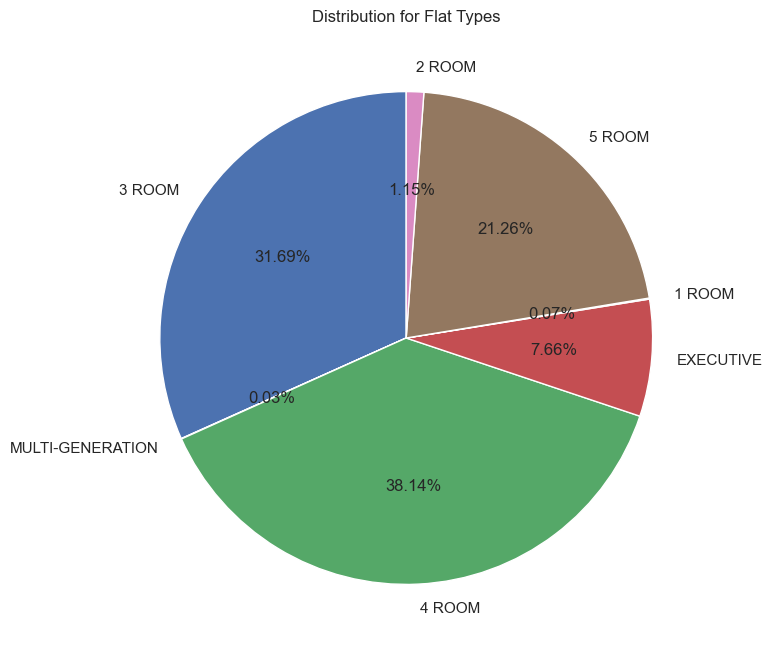

In [59]:
# Bar Plots, Charts etc.

# pie chart for flat_type

# count the occurrences of each flat_type
flat_type_counts = data_hdb_raw['flat_type'].value_counts()

# merge flat types with different names that refer to the same type
types_to_merge = ['MULTI-GENERATION', 'MULTI GENERATION']
merged_count = flat_type_counts.loc[types_to_merge].sum()
flat_type_counts = flat_type_counts.drop(types_to_merge)
flat_type_counts['MULTI-GENERATION'] = merged_count

# arrange order of flat types as text labels will overlap
custom_order = ['3 ROOM', 'MULTI-GENERATION','4 ROOM','EXECUTIVE','1 ROOM', '5 ROOM','2 ROOM'] 
flat_type_counts = data_hdb_raw['flat_type'].value_counts().loc[custom_order]

# size
plt.figure(figsize=(12, 8))

# plot
plt.pie(flat_type_counts, labels=flat_type_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Distribution for Flat Types')
plt.show()

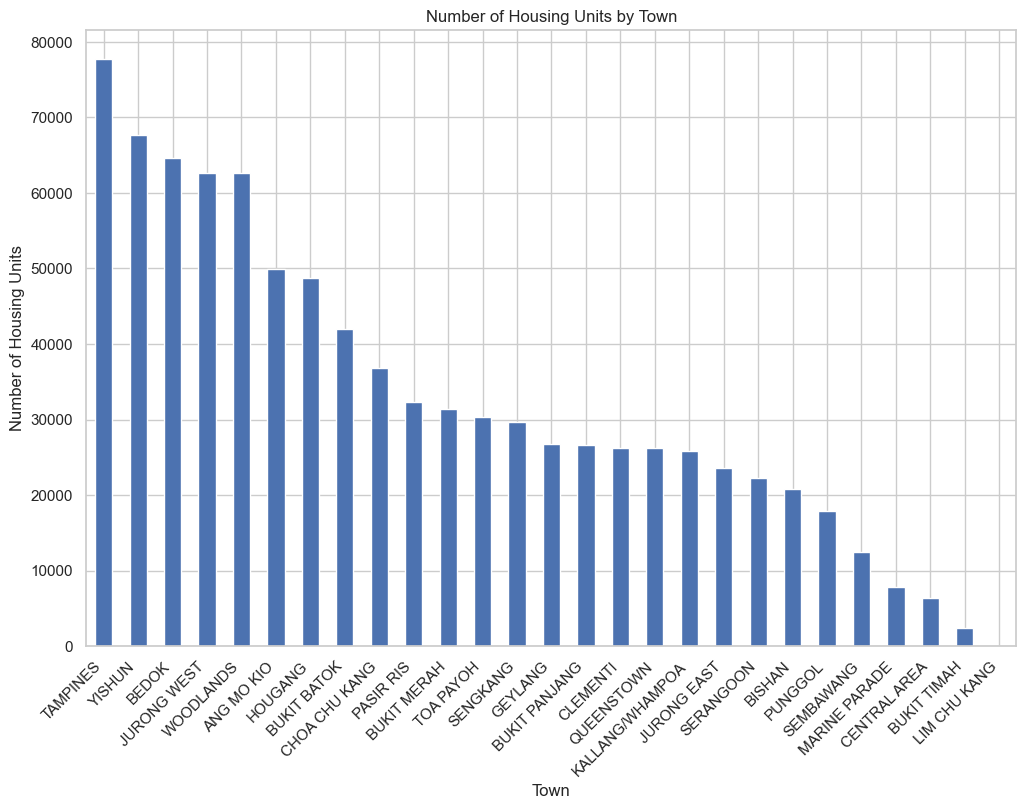

In [60]:
# bar chart for town

# count the occurrences of each town
town_counts = data_hdb_raw['town'].value_counts()

# size
plt.figure(figsize=(12, 8))

# plot
town_counts.plot(kind='bar')
plt.title('Number of Housing Units by Town')
plt.xlabel('Town')
plt.ylabel('Number of Housing Units')
plt.xticks(rotation=45, ha='right')
plt.show()

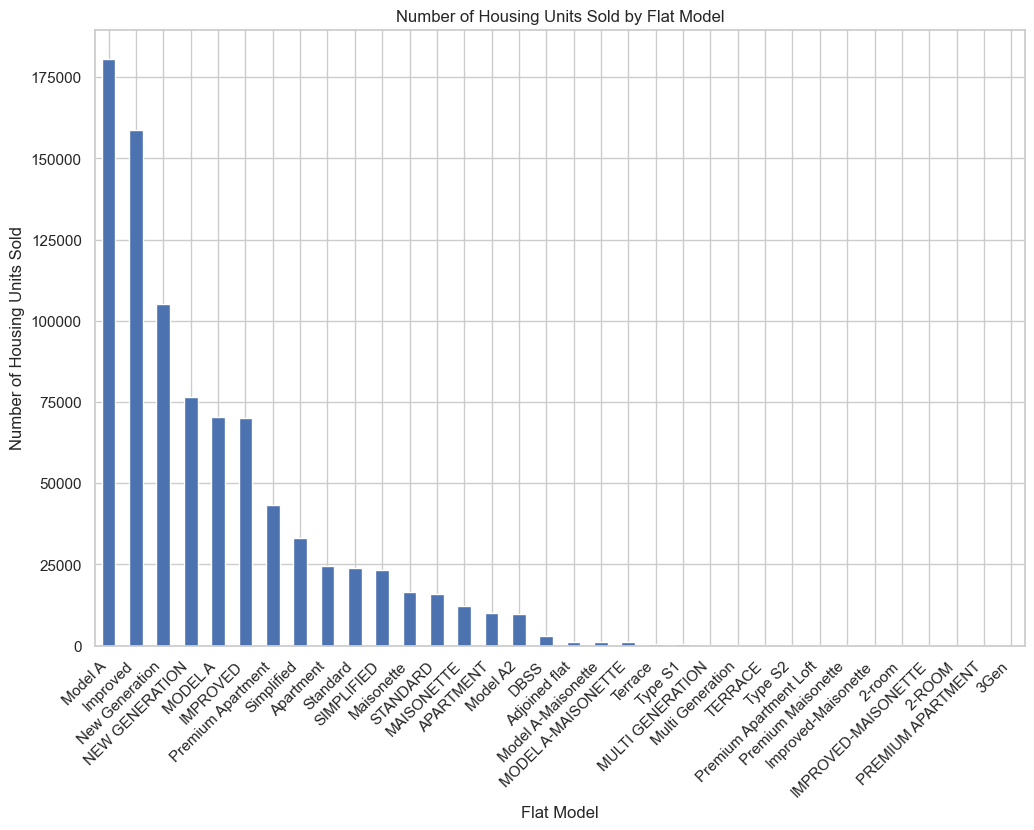

In [62]:
# bar chart for flat model

# count the occurrences of each flat_model
flat_model_counts = data_hdb_raw['flat_model'].value_counts()

# size
plt.figure(figsize=(12, 8))

# plot
flat_model_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

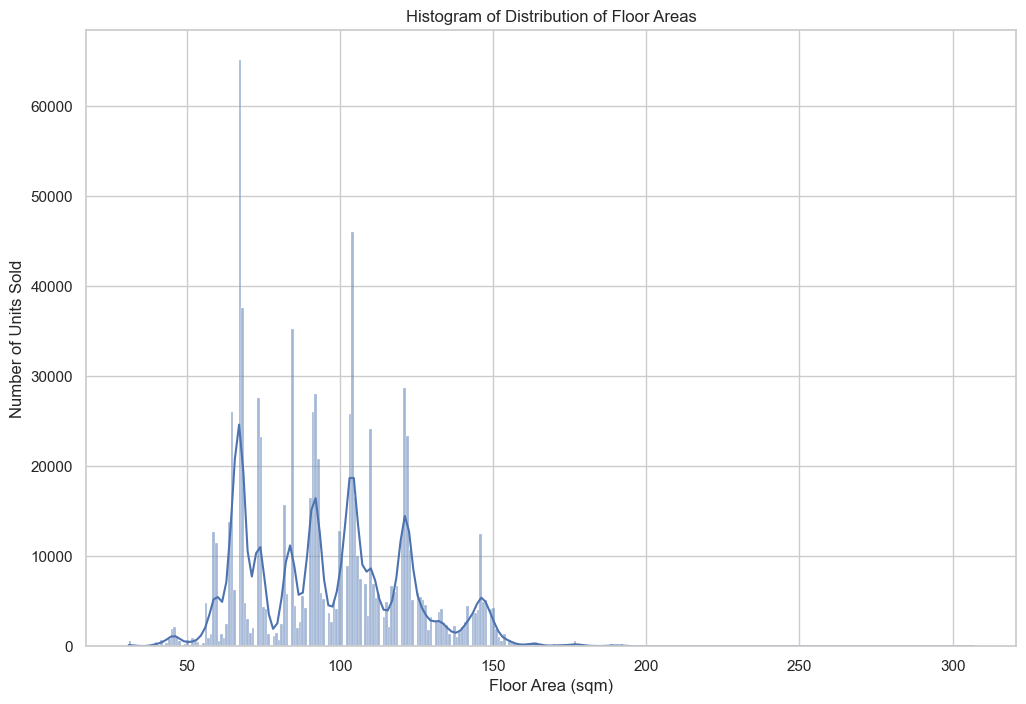

In [63]:
# histogram for floor area

# size
plt.figure(figsize=(12, 8))

# plot
sns.histplot(data_hdb_raw['floor_area_sqm'], kde=True)
plt.title('Histogram of Distribution of Floor Areas')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Number of Units Sold')
plt.show()

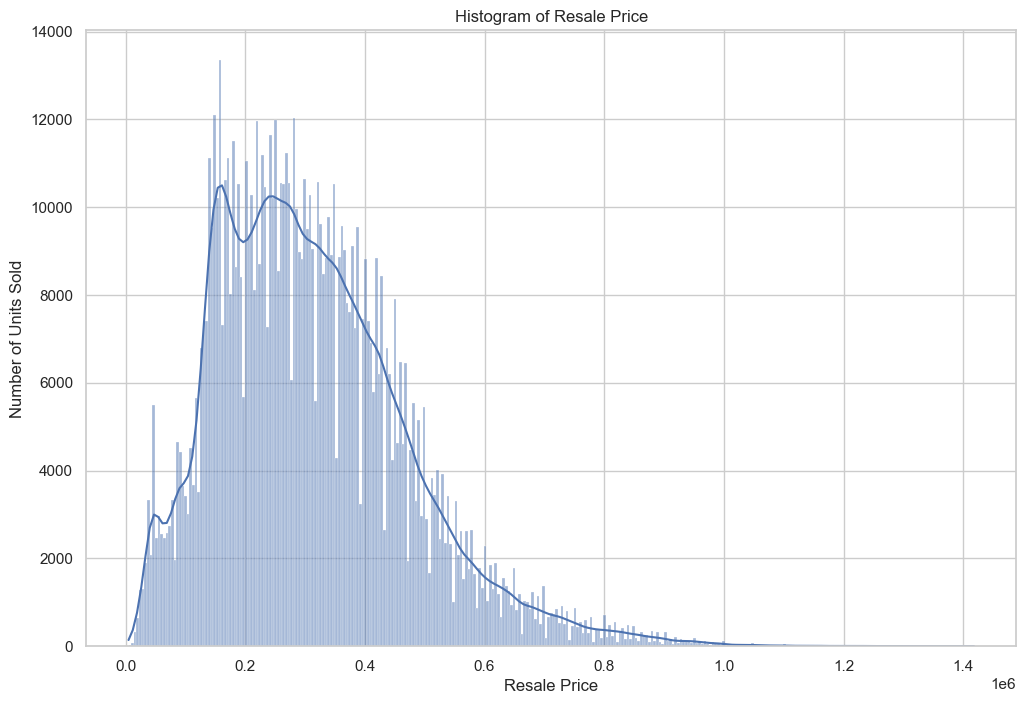

In [65]:
# histogram for resale_price

# size
plt.figure(figsize=(12, 8))

# plot
sns.histplot(data_hdb_raw['resale_price'], kde=True)
plt.title('Histogram of Resale Price')
plt.xlabel('Resale Price')
plt.ylabel('Number of Units Sold')
plt.show()

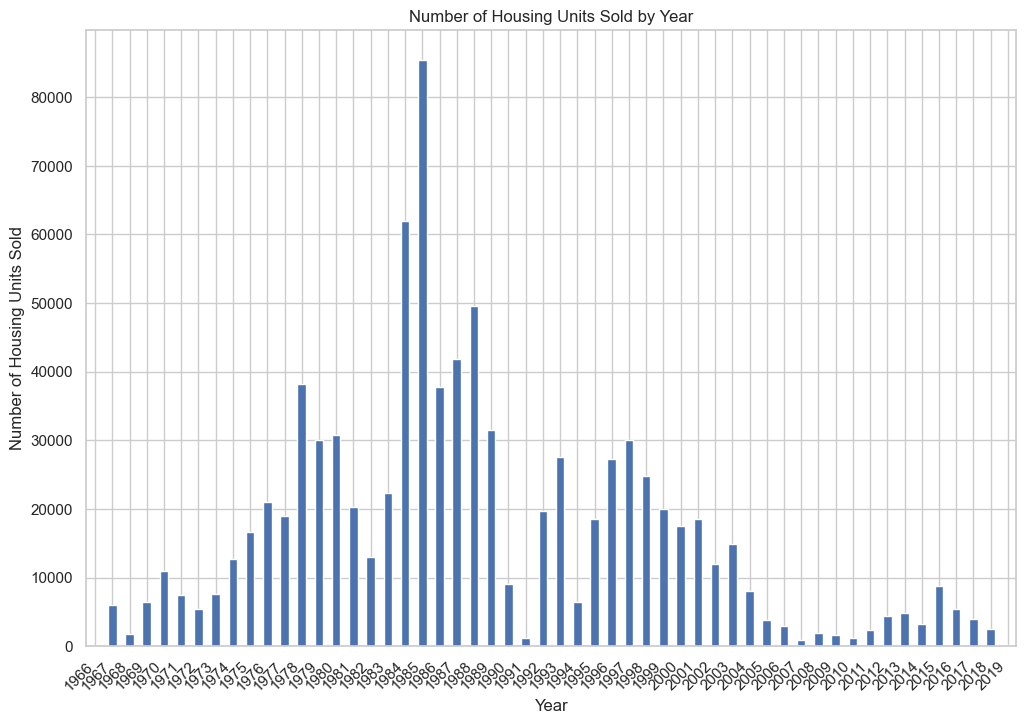

In [66]:
# bar chart for lease_commence_date

# count the occurrences of each lease_commence_date (year)
year_counts = data_hdb_raw['lease_commence_date'].value_counts().sort_index()

# size
plt.figure(figsize=(12, 8))

# plot
year_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Year')
plt.xlabel('Year')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

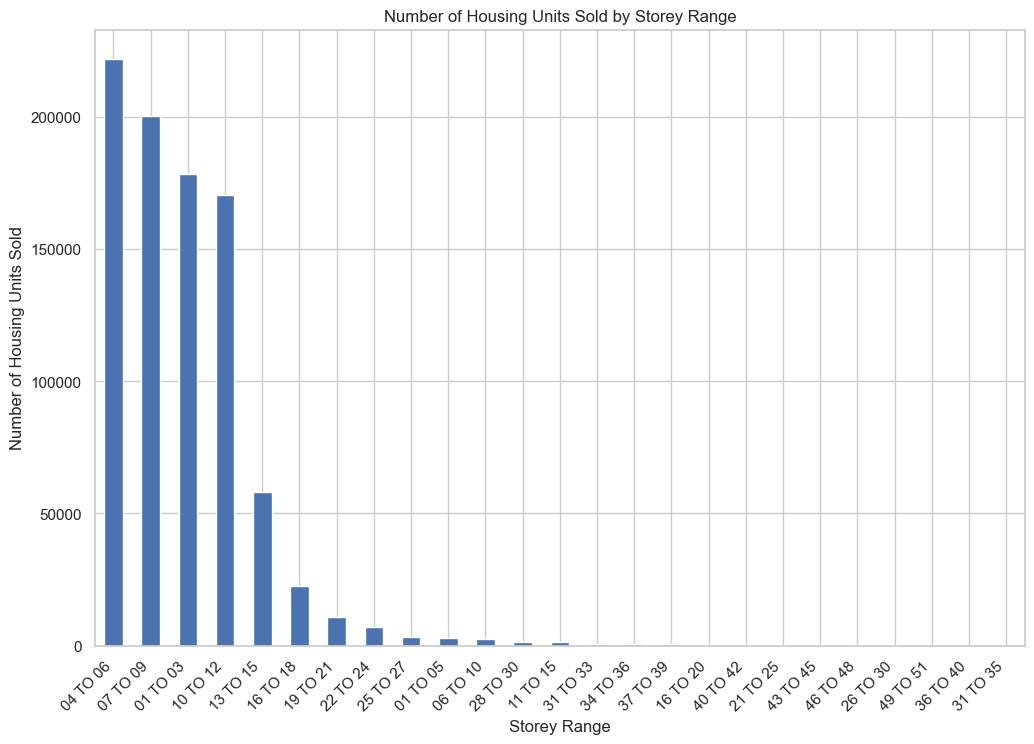

In [67]:
# bar chart for storey_range

# count the occurrences of each storey_range
story_counts = data_hdb_raw['storey_range'].value_counts()

# size
plt.figure(figsize=(12, 8))

# plot
story_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Storey Range')
plt.xlabel('Storey Range')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

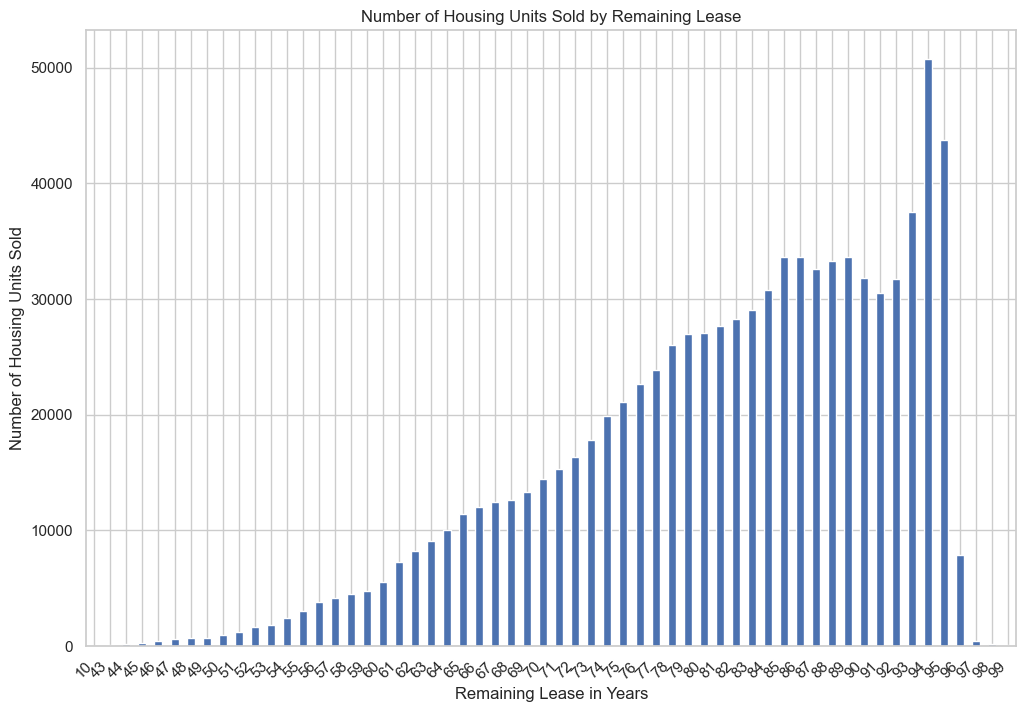

In [68]:
# the remaining_lease column contains text e.g 68 year 08 months
# get the first 2 digits to get the years remaining in lease
data_hdb_raw['first_two_digits'] = data_hdb_raw['remaining_lease'].astype(str).str[:2]

# count the occurrences of each remaining_lease
remaining_years_counts = data_hdb_raw['first_two_digits'].value_counts().sort_index()

# size
plt.figure(figsize=(12, 8))

# plot
remaining_years_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Remaining Lease')
plt.xlabel('Remaining Lease in Years')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()



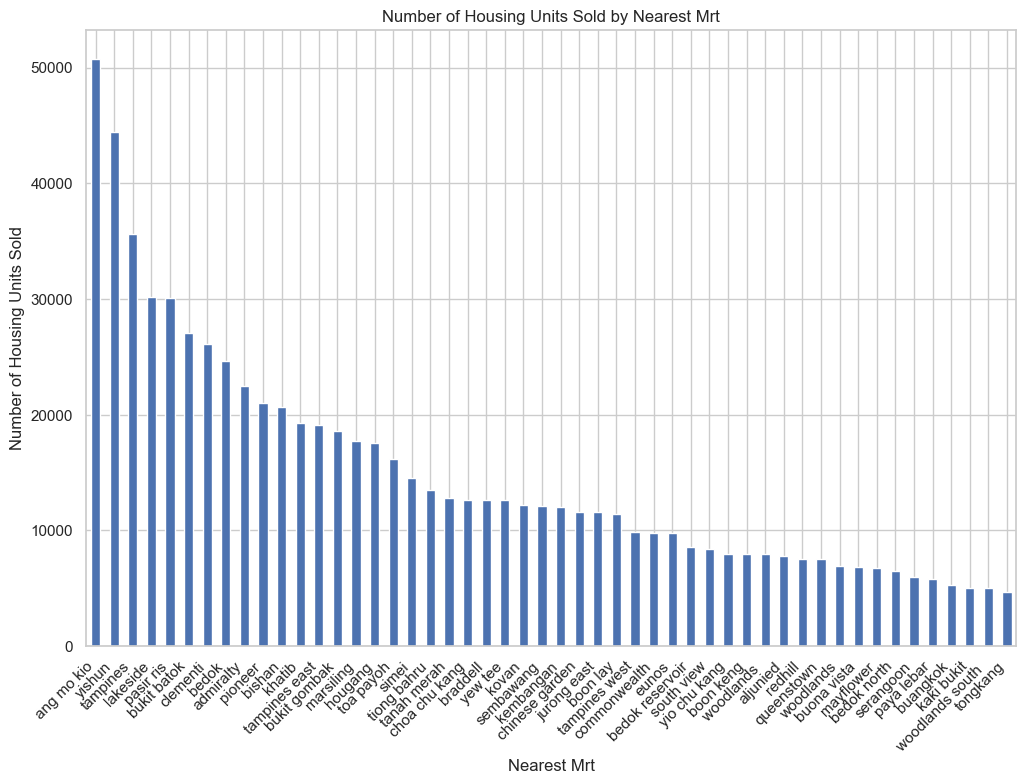

In [69]:
# bar chart for nearest_mrt

# count the occurrences for each mrt, filter top 50 as there are too many
nearest_mrt_counts = data_hdb_raw['nearest_mrt'].value_counts().head(50)

# size
plt.figure(figsize=(12, 8))

# plot
nearest_mrt_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Nearest Mrt')
plt.xlabel('Nearest Mrt')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

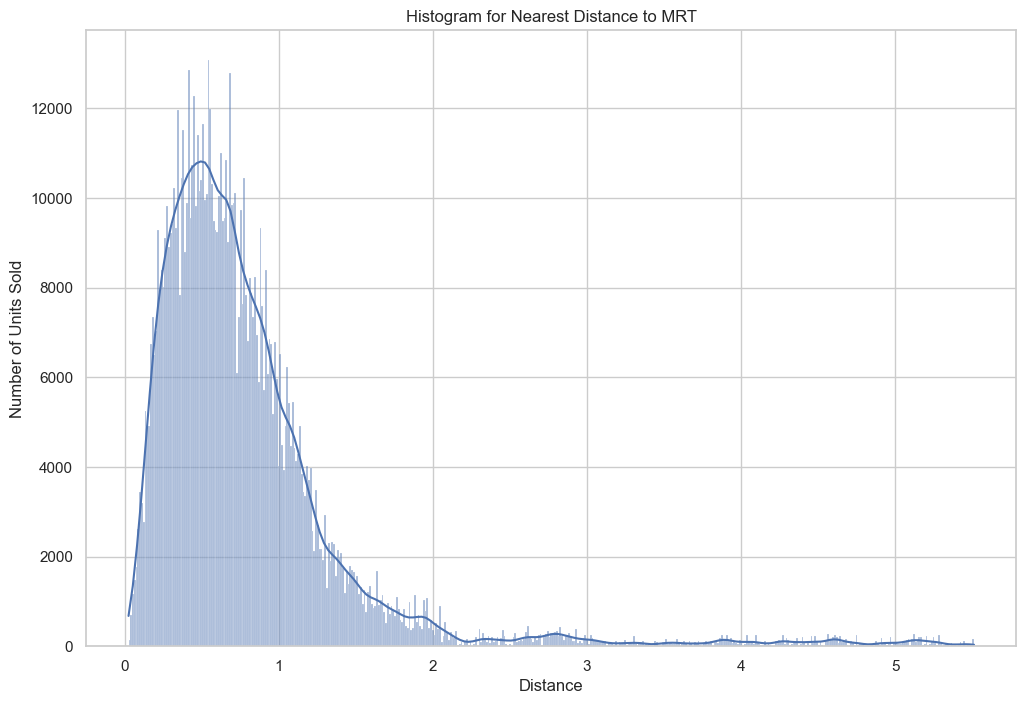

In [70]:
# histogram for nearest_distance_to_mrt

# size
plt.figure(figsize=(12, 8))

#plot
sns.histplot(data_hdb_raw['nearest_distance_to_mrt'], kde=True)
plt.title('Histogram for Nearest Distance to MRT')
plt.xlabel('Distance')
plt.ylabel('Number of Units Sold')
plt.show()

### Outlier Analysis

In [ ]:
# Box and Whiskers etc
# Kurtosis / Skew?


### Correlation Analysis

In [71]:
# Correlation Matrix
sns.heatmap(data_hdb_raw.corr(), cmap='YlGnBu'), annot = True, annot_kws={"size":5})
plt.show()

SyntaxError: unmatched ')' (224488353.py, line 2)

### Saving Dataset

In [ ]:
# Save Cleaned Dataset
data_hdb_raw.to_csv('../dataset/data_hdb_cleaned', index = False)